Melika Ahmadi Ranjbar 97521036

---
Homework 2

#Question 2


Logistic Weight:  [[1.43516077]] Bias:  [-5.9247354]
Linear Weight:  [0.01885095] Bias:  0.36128845022604983

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

For Logistic Regression:  [[4.12827297]]
For Linear Regression:  [7.35833333]

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_



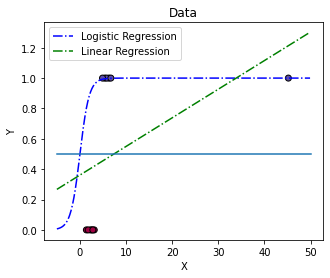

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np

def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

Dataset = np.array([2.3, 1.4, 2.6, 3.1, 1.8, 2.8, 5.4, 6.3, 5.8, 6.7, 4.9, 45.2])
Labels = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# Plot Test Data
plt.figure(1, figsize=(5, 4))
plt.title('Data')
plt.scatter(Dataset, Labels, c=Labels, edgecolors='k', cmap='Spectral')
plt.xlabel('X')
plt.ylabel('Y')


Dataset = Dataset.reshape(-1, 1)
LogReg = LogisticRegression(multi_class='ovr', solver='lbfgs')
LogReg.fit(Dataset, Labels)
print('Logistic Weight: ', LogReg.coef_, 'Bias: ', LogReg.intercept_)
Z = np.arange(-5, 50, 0.1)
plt.plot(Z, Sigmoid(Z), '-.b', label='Logistic Regression')

LinReg = LinearRegression()
LinReg.fit(Dataset, Labels)
print('Linear Weight: ', LinReg.coef_, 'Bias: ', LinReg.intercept_)
y = LinReg.coef_ * Z + LinReg.intercept_
plt.plot(Z, y, '-.g', label='Linear Regression')

print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

print('For Logistic Regression: ', -1 * LogReg.intercept_ / LogReg.coef_)
print('For Linear Regression: ', (0.5 -  LinReg.intercept_ ) / LinReg.coef_)

print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

X = [-5, 50]
Y = [0.5, 0.5]

plt.plot(X, Y)
plt.legend(loc='upper left')
plt.show()

#Question 3


(105, 2)
(45, 2)

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

Train Accuracy:  0.8095238095238095
Test Accuracy:  0.7777777777777778
The Accuracy (Using Another Way):  0.7777777777777778

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_



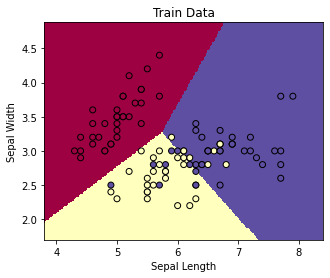


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_



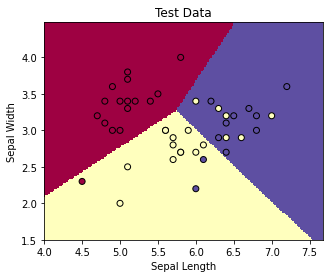


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_



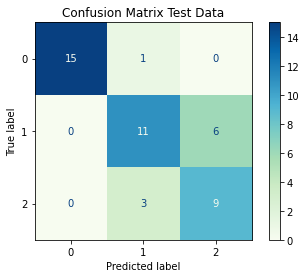


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_



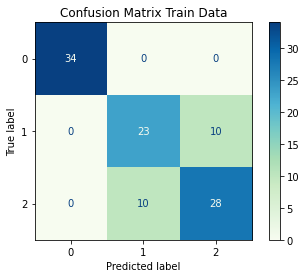

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
import numpy as np

# Load Dataset
Chart = datasets.load_iris()

# Only Frist Two Features
Data = Chart.data[:, :2]
Labels = Chart.target

# Split Data To Test & Train 
TrainData, TestData, TrainLabel, TestLabel = train_test_split(Data, Labels, test_size=0.30)

# Test The Number Of Train & Test Data
print(TrainData.shape)
print(TestData.shape)
print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

# Classifier, Train
LogisticReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LogisticReg.fit(TrainData, TrainLabel)

# Accuracies
TrainAccuracy = LogisticReg.score(TrainData, TrainLabel)
TestAccuracy = LogisticReg.score(TestData, TestLabel)
print('Train Accuracy: ', TrainAccuracy)
print('Test Accuracy: ', TestAccuracy)

# Predict Test Data, Just To Show These Two Functions Have Same Results
Predicted = LogisticReg.predict(TestData)
print('The Accuracy (Using Another Way): ', metrics.accuracy_score(Predicted, TestLabel))
print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

# Divide Classes On Plot For Train Data
XStart, XEnd = TrainData[:, 0].min() - .5, TrainData[:, 0].max() + .5
YStart, YEnd = TrainData[:, 1].min() - .5, TrainData[:, 1].max() + .5
StepSize = 0.02
xx, yy = np.meshgrid(np.arange(XStart, XEnd, StepSize), np.arange(YStart, YEnd, StepSize))
Z = LogisticReg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(1, figsize=(5, 4))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='Spectral')

# Plot Training Data
plt.title('Train Data')
plt.scatter(TrainData[:, 0], TrainData[:, 1], c=TrainLabel, edgecolors='k', cmap='Spectral')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

# Divide Classes On Plot For Test Data
XStartTest, XEndTest = TestData[:, 0].min() - .5, TestData[:, 0].max() + .5
YStartTest, YEndTest = TestData[:, 1].min() - .5, TestData[:, 1].max() + .5
xxTest, yyTest = np.meshgrid(np.arange(XStartTest, XEndTest, StepSize), np.arange(YStartTest, YEndTest, StepSize))
ZTest = LogisticReg.predict(np.c_[xxTest.ravel(), yyTest.ravel()])

# Put the result into a color plot
plt.figure(1, figsize=(5, 4))
ZTest = ZTest.reshape(xxTest.shape)
plt.pcolormesh(xxTest, yyTest, ZTest, cmap='Spectral')

# Plot Test Data
plt.figure(1, figsize=(5, 4))
plt.title('Test Data')
plt.scatter(TestData[:, 0], TestData[:, 1], c=TestLabel, edgecolors='k', cmap='Spectral')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

# Confusion Matrix For Test Data
plot_confusion_matrix(LogisticReg, TestData, TestLabel, cmap='GnBu')
plt.title('Confusion Matrix Test Data')
plt.show()
print('\n*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_\n')

# Confusion Matrix For Train Data
plot_confusion_matrix(LogisticReg, TrainData, TrainLabel, cmap='GnBu')
plt.title('Confusion Matrix Train Data')
plt.show()

